In [91]:
import pandas as pd

file_path = '/Users/maxz/Desktop/EQUOTA/combined_data.xlsx'
original_df = pd.read_excel(file_path, sheet_name='combined_outliers')
outliers_df = pd.read_excel(file_path, sheet_name='q4outlierlist')


In [92]:
original_df['Outlier'] = 1
original_df['Power'] = original_df['Power'].round(4)
original_df['GHI_2'] = original_df['GHI_2'].round(4)
outliers_df['Power'] = outliers_df['Power'].round(4)
outliers_df['GHI_2'] = outliers_df['GHI_2'].round(4)

outlier_set = set(zip(outliers_df['Power'], outliers_df['GHI_2']))

for index, row in original_df.iterrows():
    if (row['Power'], row['GHI_2']) in outlier_set:
        original_df.at[index, 'Outlier'] = 0 

output_file_path = 'total_outliers.csv'
original_df.to_csv(output_file_path, index=False)

output_file_path


'total_outliers.csv'

In [93]:
df = pd.read_csv("total_outliers.csv")
len(df[df.Outlier == 0])

29225

<function matplotlib.pyplot.show(close=None, block=None)>

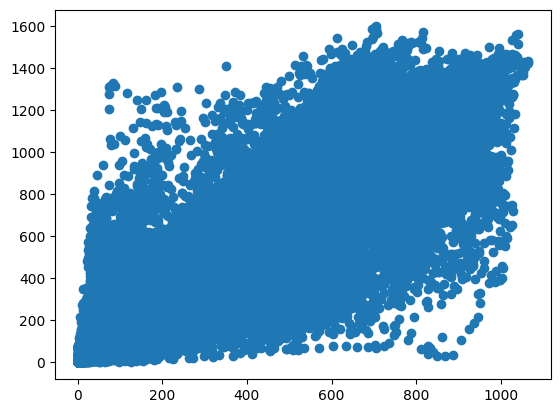

In [94]:
plt.scatter(df['GHI_2'],df['Power'])
plt.show

In [95]:
csv_files = ['Q1outliers.csv', 'Q2outliers.csv', 'Q3outliers.csv', 'Q4outliers.csv']

combined_df = pd.concat([pd.read_csv(file) for file in csv_files])

combined_df.to_csv('combined_outliers.csv', index=False)